# Lecture 7 Backtesting a Trading Strategy

**Introduction to Quantitative Methods in Finance**

**The Erdös Institute**


# Backtesting a Trading Strategy

## Introduction

Backtesting is a crucial process in the development and evaluation of trading strategies. It involves testing a trading strategy on historical data to assess its performance and viability. By simulating trades based on historical data, traders and researchers can gain insights into how a strategy might perform in the future.

## Importance of Backtesting

1. **Performance Evaluation**: Backtesting allows traders to evaluate the performance of a strategy before applying it in live trading. It helps in understanding the potential returns and risks associated with the strategy.
2. **Risk Management**: By analyzing historical drawdowns and volatility, traders can better manage risk and make informed decisions about position sizing and stop-loss levels.
3. **Strategy Optimization**: Backtesting provides a framework for optimizing strategy parameters, such as moving average windows, to maximize returns and minimize risk.
4. **Confidence Building**: Successful backtesting results can build confidence in a strategy, providing traders with the assurance needed to execute the strategy in real-time trading.

## Steps in Backtesting a Trading Strategy

### 1. Data Collection

The first step in backtesting is to collect historical data for the asset being traded. 

### 2. Strategy Implementation

Implement the trading strategy using the collected data. This involves coding the logic for generating buy and sell signals based on the chosen indicators or rules. 

### 3. Signal Generation

Generate trading signals based on the implemented strategy. Each signal corresponds to a trade action (buy or sell) triggered by the strategy's rules.

### 4. Portfolio Simulation

Simulate a trading portfolio based on the generated signals. This involves:
- Calculating position sizes based on the trading signals.
- Computing daily returns for the strategy by applying the generated signals to the historical data.
- Tracking the cumulative returns of the strategy over time.

### 5. Performance Metrics

Evaluate the performance of the strategy using key metrics such as:
- **Cumulative Returns**: The total return of the strategy over the backtesting period.
- **Volatility**: The standard deviation of the strategy's returns, indicating the risk or variability of returns.
- **Sharpe Ratio**: A measure of risk-adjusted returns, calculated as the ratio of the strategy's average return to its standard deviation.
- **Drawdown**: The peak-to-trough decline in the portfolio's value, indicating the risk of significant losses.

### 6. Optimization

Optimize the strategy parameters to improve performance.

## Crossover Strategy in Stock Trading

### Introduction

The crossover strategy is a popular technical analysis tool used in stock trading to identify potential buy and sell signals. This strategy primarily relies on moving averages, which smooth out price data to identify trends over specific periods. 

### Moving Averages

**Simple Moving Average (SMA)**: The SMA is calculated by averaging the closing prices over a specified period. For example, a 10-day SMA is the average of the closing prices over the last 10 days.


### Types of Crossovers

1. **Golden Cross**:
   - Occurs when a short-term moving average (e.g., 50-day SMA) crosses above a long-term moving average (e.g., 200-day SMA).
   - This crossover is considered a bullish signal, indicating the potential for upward price movement.

2. **Death Cross**:
   - Occurs when a short-term moving average crosses below a long-term moving average.
   - This crossover is considered a bearish signal, indicating the potential for downward price movement.

### Implementing the Strategy

1. **Identify the Moving Averages**:
   - Choose appropriate time periods for the short-term and long-term moving averages based on the trading strategy (e.g., 10-day and 50-day for short-term trading, 50-day and 200-day for long-term investing).

2. **Monitor Crossovers**:
   - Track the price movements and moving averages to identify when crossovers occur.

3. **Generate Signals**:
   - **Buy Signal**: When the short-term moving average crosses above the long-term moving average (Golden Cross).
   - **Sell Signal**: When the short-term moving average crosses below the long-term moving average (Death Cross).


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# Function to backtest moving average strategy
def moving_avg_strat_backtest(stock_data, long_moving_average, short_moving_average):
    'Creates buy signal when stock short_moving_average is greater than long_moving_average'
    'Returns market and porfolios cumulative returns for comparison'
    
    # Calculate the long-term moving average percentage
    stock_data[f'{long_moving_average}-day moving average'] = stock_data['Adj Close'].rolling(window=long_moving_average).mean() - 1

    # Calculate the short-term moving average percentage
    stock_data[f'{short_moving_average}-day moving average'] = stock_data['Adj Close'].rolling(window=short_moving_average).mean() - 1

    # Drop rows with NaN values resulting from moving average calculations
    stock_data_cleaned = stock_data.dropna(subset=[f'{long_moving_average}-day moving average', f'{short_moving_average}-day moving average']).copy()

    # Generate buy/sell signals
    stock_data_cleaned['buy/sell signals'] = (stock_data_cleaned[f'{short_moving_average}-day moving average'] > stock_data_cleaned[f'{long_moving_average}-day moving average']).astype(int)

    # Create a portfolio
    stock_data_cleaned['position'] = stock_data_cleaned['buy/sell signals'].shift(1)  # Shift to avoid look-ahead bias
    stock_data_cleaned['daily returns'] = stock_data_cleaned['Adj Close'].pct_change()
    stock_data_cleaned['strategy returns'] = stock_data_cleaned['position'] * stock_data_cleaned['daily returns']

    # Calculate cumulative returns
    stock_data_cleaned['cumulative strategy returns'] = (1 + stock_data_cleaned['strategy returns']).cumprod() - 1
    stock_data_cleaned['cumulative market returns'] = (1 + stock_data_cleaned['daily returns']).cumprod() - 1
    
    return stock_data_cleaned[['cumulative strategy returns', 'cumulative market returns']]

In [4]:
# Function to find optimal moving average windows
def optimal_ma_windows(stock, short_term_moving_averages, long_term_moving_averages, start_date, end_date):
    stock_data = yf.download(stock, start=start_date, end=end_date)
    
    portfolio_sharpe = {}
    for short_window in short_term_moving_averages:
        for long_window in long_term_moving_averages:
            if short_window >= long_window:
                continue
            returns = moving_avg_strat_backtest(stock_data, long_window, short_window)
            strat_log_return = np.log((returns['cumulative strategy returns'].dropna() + 1) / (returns['cumulative strategy returns'].dropna().shift(1) + 1))
            strat_vol = np.std(strat_log_return.dropna()) * np.sqrt(252)
            return_sharpe = (returns['cumulative strategy returns'].iloc[-1] - returns['cumulative market returns'].iloc[-1]) / strat_vol
            portfolio_sharpe[(short_window, long_window)] = return_sharpe
    
    return portfolio_sharpe

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


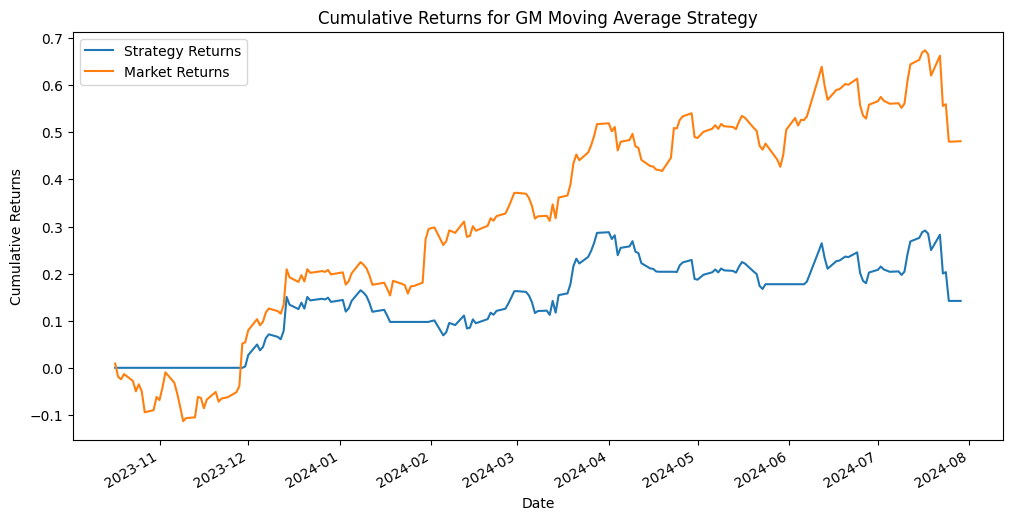

[*********************100%%**********************]  1 of 1 completed

Optimal crossover strategy out performed for GM during training period
Crossover strategy for GM did not outperform market during testing period



[*********************100%%**********************]  1 of 1 completed


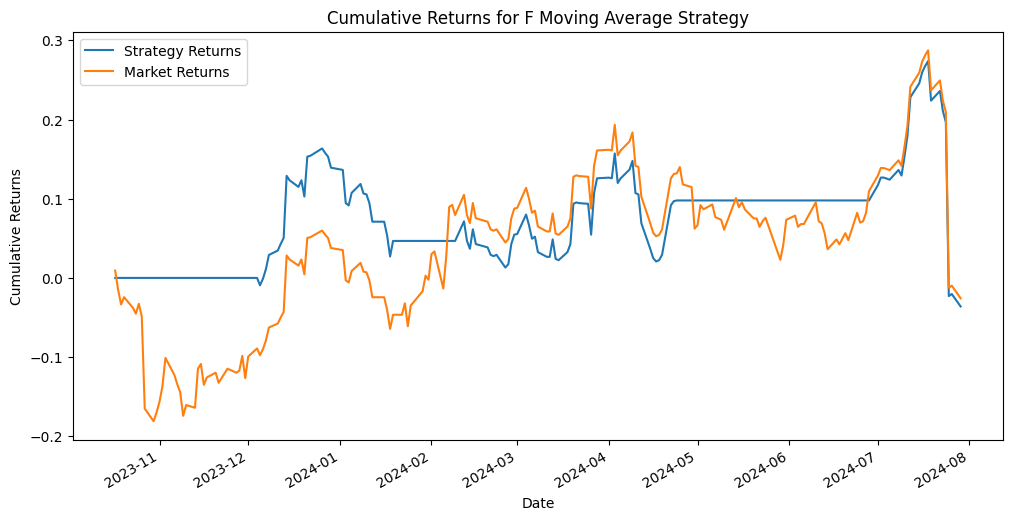

[*********************100%%**********************]  1 of 1 completed

Optimal crossover strategy out performed for F during training period
Crossover strategy for F did not outperform market during testing period



[*********************100%%**********************]  1 of 1 completed


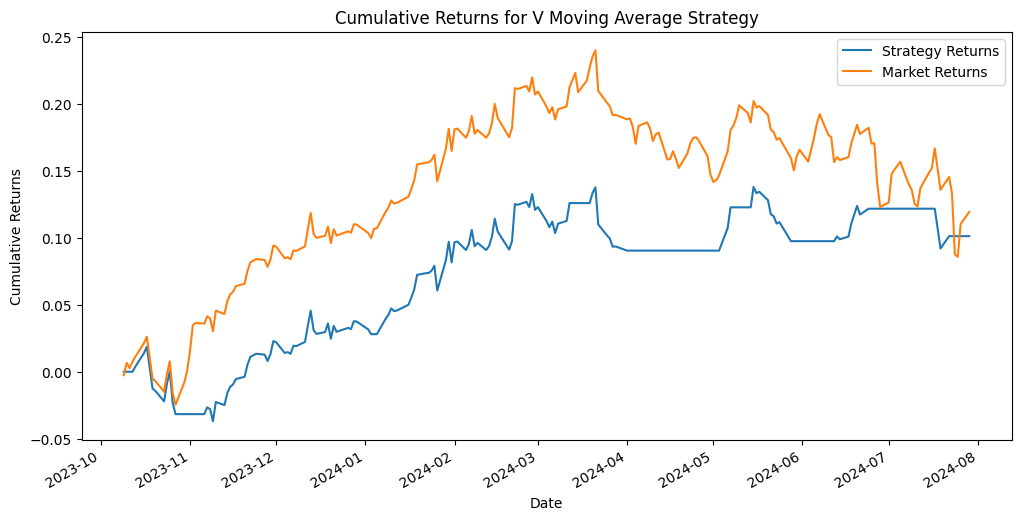

[*********************100%%**********************]  1 of 1 completed

Optimal crossover strategy did not outperform for V during training period
Crossover strategy for V did not outperform market during testing period



[*********************100%%**********************]  1 of 1 completed


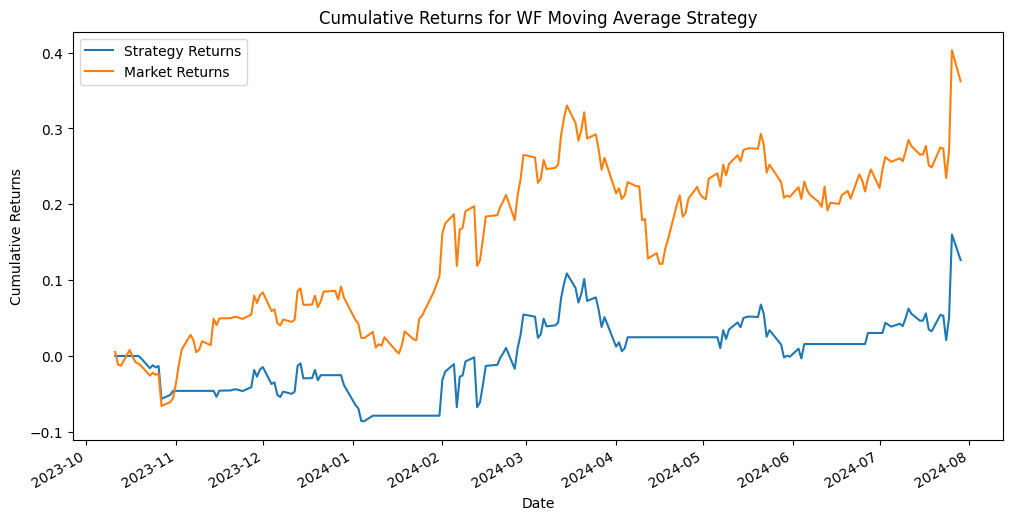

[*********************100%%**********************]  1 of 1 completed

Optimal crossover strategy out performed for WF during training period
Crossover strategy for WF did not outperform market during testing period



[*********************100%%**********************]  1 of 1 completed


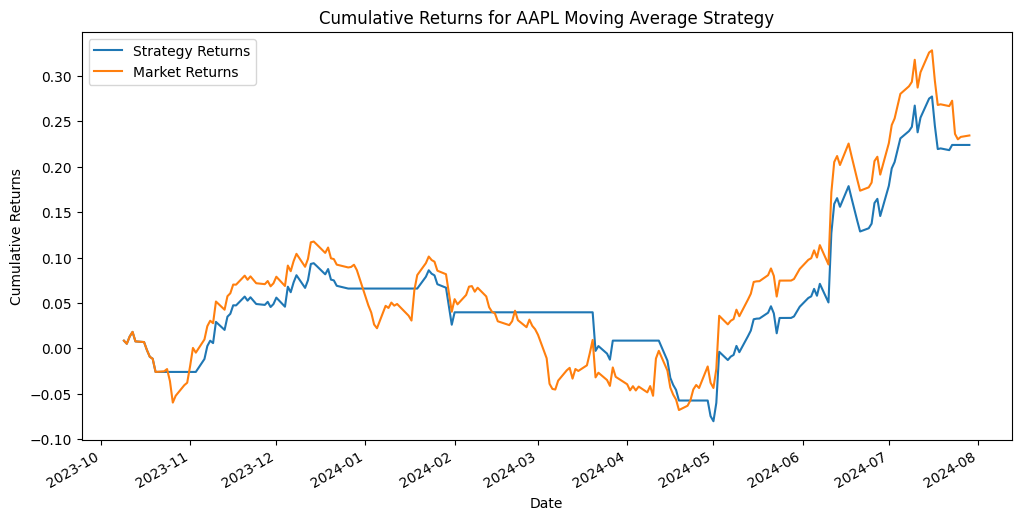

[*********************100%%**********************]  1 of 1 completed

Optimal crossover strategy out performed for AAPL during training period
Crossover strategy for AAPL did not outperform market during testing period



[*********************100%%**********************]  1 of 1 completed


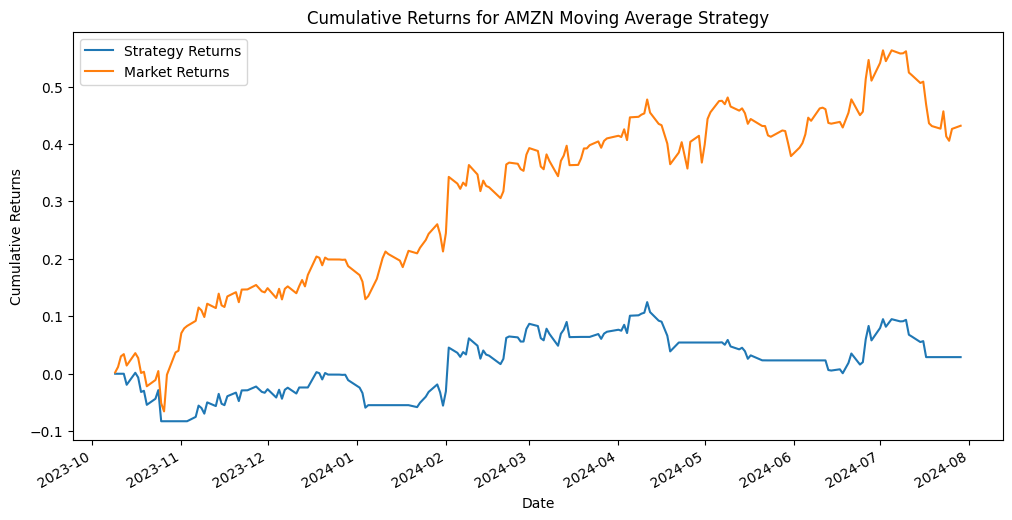

Optimal crossover strategy out performed for AMZN during training period
Crossover strategy for AMZN did not outperform market during testing period


In [6]:
# Parameters for moving averages and dates
short_term_moving_averages = [5, 10, 15]
long_term_moving_averages = [15,20,30]
start_date = dt.datetime.now() - dt.timedelta(days=365*5)
end_date = dt.datetime.now()
testing_days = 300
training_end_date = dt.datetime.now() - dt.timedelta(days=testing_days)
stocks = ['GM','F','V','WF','AAPL','AMZN']


sharpes_MA = {}
stock_optimal_MA = {}
for stock in stocks:

    # Calculate Sharpe ratios for different moving average windows
    ma_sharpes = optimal_ma_windows(stock, short_term_moving_averages, long_term_moving_averages, start_date, training_end_date)
    
    sharpes_MA[stock] = ma_sharpes

    # Find the optimal moving average windows
    max_key = max(ma_sharpes, key=ma_sharpes.get)
    max_value = ma_sharpes[max_key]
    short_window, long_window = max_key
    
    stock_optimal_MA[stock] = {max_key}

    # Download data for the test period
    test_start_date = end_date - dt.timedelta(days=(long_window + testing_days + 1))
    stock_data = yf.download(stock, start=test_start_date, end=end_date)

    # Backtest with the optimal moving average windows
    returns = moving_avg_strat_backtest(stock_data, long_window, short_window)

    # Plot the cumulative returns
    plt.figure(figsize=(12, 6))
    returns['cumulative strategy returns'].plot(label='Strategy Returns')
    returns['cumulative market returns'].plot(label='Market Returns')
    plt.title(f'Cumulative Returns for {stock} Moving Average Strategy')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()
    
    if ma_sharpes[max_key]>0:
        print(f'Optimal crossover strategy out performed for {stock} during training period')
    if ma_sharpes[max_key]<=0:
        print(f'Optimal crossover strategy did not outperform for {stock} during training period')
    
    
    if returns['cumulative strategy returns'].iloc[-1]>returns['cumulative market returns'].iloc[-1]:
        print(f'Crossover strategy for {stock} outperformed market during testing period')
        
    if returns['cumulative strategy returns'].iloc[-1]<=returns['cumulative market returns'].iloc[-1]:
        print(f'Crossover strategy for {stock} did not outperform market during testing period')


    

## Risks of Overfitting When Creating a Trading Signal

### Introduction

Finding buy/sell signals is a common practice in quantitative finance. However, this process can lead to overfitting, resulting in a strategy that performs well on historical data but fails to generalize to new, unseen data. Overfitting can create a false sense of strategy robustness and lead to poor performance in live trading.

### What is Overfitting?

Overfitting occurs when a model or strategy models random fluctuations in historical data. This results in a model that is too complex and tailored to the specific dataset, reducing its predictive power on new data. Overfitting is a significant concern in the optimization of trading strategies, where the goal is to identify robust, generalizable patterns.

### Causes of Overfitting in Finding Optimal Crossover Windows

Excessive parameter tuning is the primary cause of overfitting in time series data. While there are instances where overfitting a dataset can be valuable, particularly in certain machine learning applications, time series data rarely benefits from such methods.


### Indicators of Overfitting

#### 1. High In-Sample Performance vs. Poor Out-of-Sample Performance


#### 2. Complex Strategies

Overly complex strategies with many parameters and rules are more likely to be overfitted. Simpler strategies are generally more robust and less prone to capturing noise.

#### 3. Lack of Robustness Across Different Market Conditions

A strategy that only works under specific market conditions or on a particular dataset is likely overfitted. Robust strategies should perform reasonably well across various market environments.

### Call Option spreads

Call option spreads involves the simultaneous purchase and sale of two call options on the same underlying asset with the same expiration date but different strike prices.

**How Call Spreads work**

Market Making Strategy: Sell a call with a higher implied volatility, buy a call with lower implied volatility.

In [7]:
import warnings
import math
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta
import py_vollib.black_scholes.implied_volatility as iv
import scipy.stats as stats
import time
import yfinance as yf
import datetime as dt
from polygon import RESTClient
import pandas as pd

sns.set_style('darkgrid')

In [8]:
%run api.py
client = RESTClient(key)

In [9]:
%run Functions.py

In [10]:
ticker = 'AAPL'

start_date = dt.datetime.now()-dt.timedelta(days=300)
end_date = dt.datetime.now()

stock_data = yf.download(ticker, start = start_date, end = end_date)


historical_stock_price = stock_data['Close'][0]

formatted_date = start_date.strftime('%Y-%m-%d')

[*********************100%%**********************]  1 of 1 completed


In [11]:
historical_stock_price

np.float64(173.66000366210938)

In [12]:
contractNames = []
for c in client.list_options_contracts(underlying_ticker = ticker, limit = 1000, as_of=formatted_date):
    contractNames.append(c)

In [13]:
len(contractNames)

1904

In [15]:
contractNames[0]

OptionsContract(additional_underlyings=None, cfi='OCASPS', contract_type='call', correction=None, exercise_style='american', expiration_date='2023-10-06', primary_exchange='BATO', shares_per_contract=100, strike_price=50, ticker='O:AAPL231006C00050000', underlying_ticker='AAPL')

In [16]:
puts = []
calls = []
for i in range(len(contractNames)):
    data = contractNames[i]
    if data.contract_type== 'put':
        puts.append(data)
    else:
        calls.append(data)

In [17]:
len(calls)

952

In [18]:
# Define the strike range and expiration date range
calls_in_range = []
strike_range = 12
min_exp_days = 60
max_exp_days = 90
lower_exp_date = start_date + dt.timedelta(days=min_exp_days)
higher_exp_date = start_date + dt.timedelta(days=max_exp_days)

lower_exp_date_formatted = lower_exp_date.strftime('%Y-%m-%d')
higher_exp_date_formatted = higher_exp_date.strftime('%Y-%m-%d')

# Convert string dates to datetime objects
start_date_dt = dt.datetime.strptime(lower_exp_date_formatted, '%Y-%m-%d')
end_date_dt = dt.datetime.strptime(higher_exp_date_formatted, '%Y-%m-%d')

for i in range(len(calls)):
    data = calls[i]
    expiration_date_str = data.expiration_date
    
    # Convert expiration_date to datetime object
    expiration_date_dt = dt.datetime.strptime(expiration_date_str, '%Y-%m-%d')
    
    # Check if strike price and expiration date are within the desired range
    if (0 <= -math.ceil(historical_stock_price) + data.strike_price <= strike_range) and (min_exp_days<=time_to_expiration(formatted_date, expiration_date_str)<=max_exp_days):
        calls_in_range.append(data)

In [19]:
len(calls_in_range)

3

In [20]:
call_market_price = {}

for i in range(len(calls_in_range)):
    ticker_name = calls_in_range[i].ticker
    try:
        # Make the API call
        OptionData = client.get_aggs(
            ticker=ticker_name,
            multiplier=1,
            timespan='day',
            from_=formatted_date,
            to=formatted_date
        )
        
        # Check if OptionData is not empty
        if OptionData:
            # Access the close price
            call_market_price[ticker_name] = OptionData[0].close
        
    except Exception as e:
        # Handle exceptions, e.g., API call errors
        print(f"Error retrieving data for {ticker_name}: {e}")
        call_market_price[ticker_name] = None  

In [21]:
options_data = [
    {
        'ticker': data.ticker,
        'contract_type': data.contract_type,
        'expiration_date': data.expiration_date,
        'strike_price': data.strike_price,
        'underlying_ticker': data.underlying_ticker
    }
    for data in calls_in_range
]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(options_data)

# Set the ticker as the index
df.set_index('ticker', inplace=True)

In [22]:
df['market_price'] = df.index.map(call_market_price)
df_cleaned = df.dropna(subset=['market_price'])

In [26]:
df_cleaned

,contract_type,expiration_date,strike_price,underlying_ticker,market_price,days_to_expiration,black_scholes_implied_vol
ticker,,,,,,,
O:AAPL231215C00175000,call,2023-12-15,175,AAPL,8.05,72.0,0.281956
O:AAPL231215C00180000,call,2023-12-15,180,AAPL,5.50,72.0,0.264671
O:AAPL231215C00185000,call,2023-12-15,185,AAPL,3.57,72.0,0.251760


In [24]:
df_cleaned['days_to_expiration'] = np.nan

for index in df_cleaned.index:
    expiration_date = df_cleaned['expiration_date'][index]
    days_to_expiration = time_to_expiration(formatted_date, expiration_date)
    df_cleaned['days_to_expiration'][index] = days_to_expiration

In [25]:
df_cleaned['black_scholes_implied_vol'] = np.nan

for index in df_cleaned.index:
    implied_vol = iv.implied_volatility(df_cleaned['market_price'][index], historical_stock_price, df_cleaned['strike_price'][index], df_cleaned['days_to_expiration'][index]/365,0,'c')
    df_cleaned['black_scholes_implied_vol'][index] = implied_vol

In [27]:
implied_vol_dictionary = {index : df_cleaned['black_scholes_implied_vol'][index] for index in df_cleaned.index}

# Identify the key with the highest value
max_key = max(implied_vol_dictionary, key=implied_vol_dictionary.get)
max_value = implied_vol_dictionary[max_key]

# Identify the key with the lowest value
min_key = min(implied_vol_dictionary, key=implied_vol_dictionary.get)
min_value = implied_vol_dictionary[min_key]

print(f"Key with the highest implied volatility: {max_key} with value {max_value}")
print(f"Key with the lowest implied volatility: {min_key} with value {min_value}")

Key with the highest implied volatility: O:AAPL231215C00175000 with value 0.2819564640074815
Key with the lowest implied volatility: O:AAPL231215C00185000 with value 0.2517601721449446


In [28]:
df_cleaned.loc[max_key]

contract_type                      call
expiration_date              2023-12-15
strike_price                        175
underlying_ticker                  AAPL
market_price                       8.05
days_to_expiration                 72.0
black_scholes_implied_vol      0.281956
Name: O:AAPL231215C00175000, dtype: object

In [29]:
df_cleaned.loc[min_key]

contract_type                      call
expiration_date              2023-12-15
strike_price                        185
underlying_ticker                  AAPL
market_price                       3.57
days_to_expiration                 72.0
black_scholes_implied_vol       0.25176
Name: O:AAPL231215C00185000, dtype: object

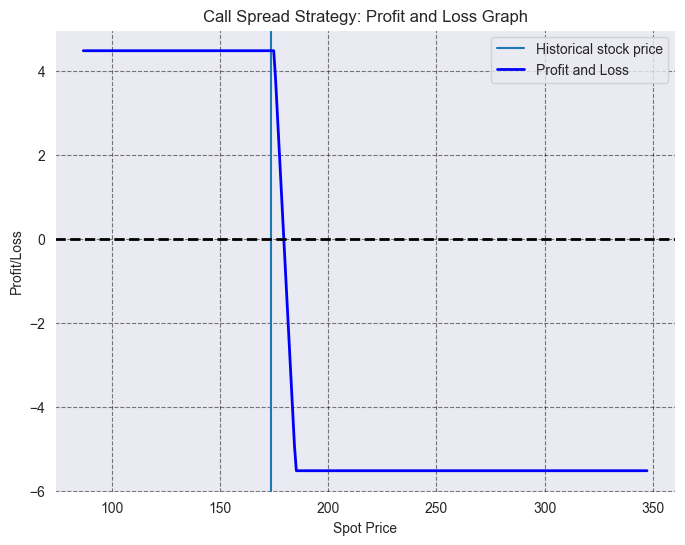

4.48 175 185


In [30]:
spread_call_profit_loss_graph(historical_stock_price, df_cleaned.loc[max_key]['strike_price'], 1, 
                              df_cleaned.loc[max_key]['market_price'], 
                              df_cleaned.loc[min_key]['strike_price'], 1, 
                              df_cleaned.loc[min_key]['market_price'])

Expected profit: 0.7078445264444047
Chance of profit: 61.643%


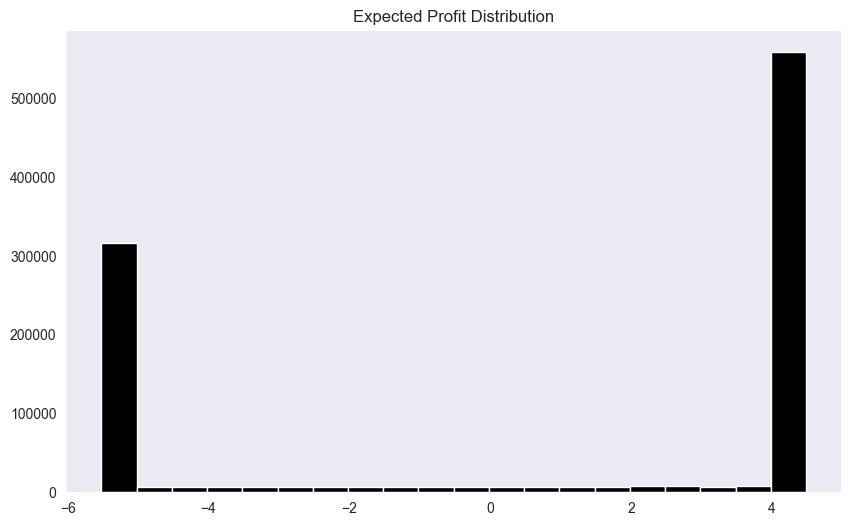

In [31]:
end_trade_date = earliest_date(df['expiration_date'][min_key],df['expiration_date'][max_key])

S0 = historical_stock_price
T = time_to_expiration(formatted_date,end_trade_date)/252
K0 = df_cleaned.loc[max_key]['strike_price']
K1 = df_cleaned.loc[min_key]['strike_price']
sigma = df_cleaned.loc[max_key]['black_scholes_implied_vol']
call_sold_premium = df_cleaned.loc[max_key]['market_price']
call_bought_premium = df_cleaned.loc[min_key]['market_price']

black_scholes_simulated_profits(S0, T, K0, K1, sigma, call_sold_premium, call_bought_premium)

In [32]:
%run Functions.py

In [33]:
OptionDataMin = client.get_aggs(ticker = min_key,
                               multiplier = 1,
                               timespan = 'day',
                               from_ = formatted_date,
                               to = end_trade_date)
optionMinDataFrame = pd.DataFrame(OptionDataMin)

#create Date column
optionMinDataFrame['Date'] = optionMinDataFrame['timestamp'].apply(
                          lambda x: pd.to_datetime(x*1000000).date())

optionMinDataFrame = optionMinDataFrame.set_index('Date')

In [34]:
OptionDataMax = client.get_aggs(ticker = max_key,
                               multiplier = 1,
                               timespan = 'day',
                               from_ = formatted_date,
                               to = end_trade_date)
optionMaxDataFrame = pd.DataFrame(OptionDataMax)


#create Date column
optionMaxDataFrame['Date'] = optionMaxDataFrame['timestamp'].apply(
                          lambda x: pd.to_datetime(x*1000000).date())

optionMaxDataFrame = optionMaxDataFrame.set_index('Date')

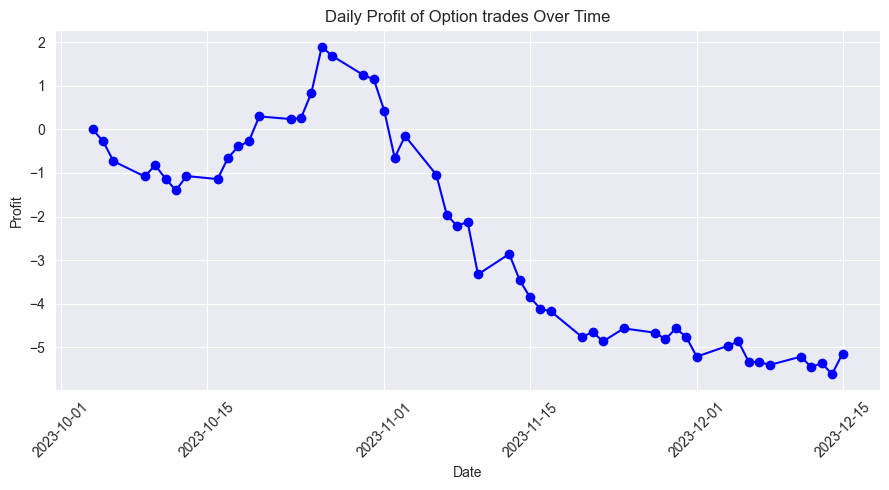

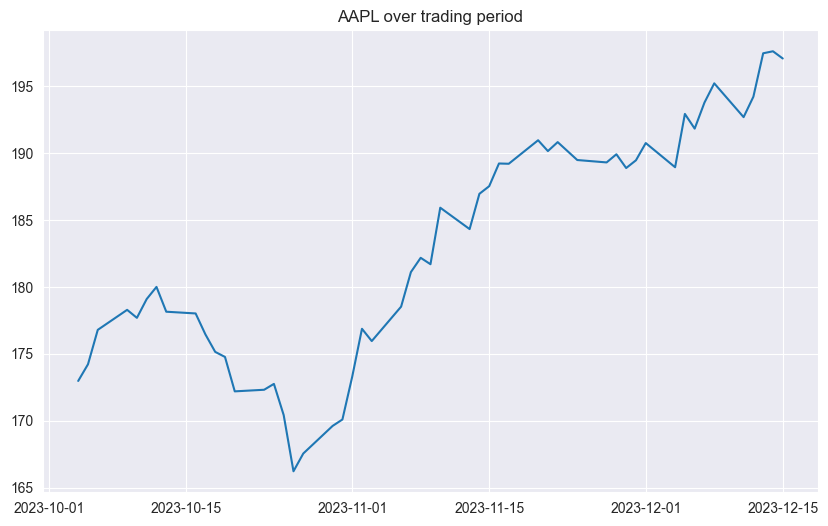

In [35]:
daily_profits = {}
initial_premium = df_cleaned['market_price'][max_key] - df_cleaned['market_price'][min_key]
  
for date in optionMaxDataFrame.index:
    if date in optionMinDataFrame.index:
        sold_value = optionMaxDataFrame['close'][date]
        bought_value = optionMinDataFrame['close'][date]
        daily_profits[date] = -sold_value + bought_value + initial_premium
    


# Convert dictionary keys (dates) to datetime objects
dates = [pd.Timestamp(date) for date in daily_profits.keys()]
profits = list(daily_profits.values())

# Create a DataFrame from the daily profits
df_daily_profits = pd.DataFrame({'Date': dates, 'Profit': profits})

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(df_daily_profits['Date'], df_daily_profits['Profit'], marker='o', linestyle='-', color='b')

# Formatting the plot
plt.title('Daily Profit of Option trades Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()



formatted_date = pd.to_datetime(formatted_date)
end_trade_date = pd.to_datetime(end_trade_date)

filtered_data = stock_data.loc[formatted_date:end_trade_date]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['Adj Close'])
plt.title(f'{ticker} over trading period')
plt.show()


In [ ]:
plt.plot(stock_data['Adj Close'], from formatted_date, to end_trade_date)
plt.show()

In [ ]:
stock_data